<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/Analise_Base_Clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import math as math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, plot_confusion_matrix
from scipy import stats
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [3]:
# define cores
cinza1, cinza2, cinza3 = '#E5E5E5', '#D8D8D8', '#BFBEBE'
cinza4, cinza5, cinza6 = '#929497', '#808080', '#76787B'
cinza7, cinza8, cinza9 = '#646369', '#555655', '#414040'
amarelo1, amarelo2, amarelo3 = '#FFFFCC', '#FFFF66', '#FFFF00'
amarelo4, amarelo5, amarelo6 = '#CCCC00', '#999900', '#666600'
laranja1, laranja2, laranja3 = '#FFA500', '#FF8C00', '#FF4500'
verde1, verde2 = '#32CD32', '#ADFF2F'

plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['ytick.color'] = cinza4
plt.rcParams['xtick.color'] = cinza4
plt.rcParams['legend.edgecolor'] = cinza6
plt.rcParams['legend.facecolor'] = 'black'
plt.rcParams['text.color'] = cinza3

In [4]:
def negrito(texto):
  return '$\\bf{'+texto.replace(' ','\ ')+'}$'

def formatar_grafico(ax, xlimite, ylimite, cor=cinza4, fonte=13):
  ax.spines['bottom'].set_color(cor)
  ax.spines['left'].set_color(cor)
  ax.spines['right'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.tick_params(bottom=False, color=cor)
  ax.set_xlim(xlimite)
  ax.set_ylim(ylimite)
  for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(fonte)
    i.set_color(cor)
  plt.xlabel('')

def colorir_legenda(legenda, cores, cortitulo=cinza4):
  legenda.get_title().set_color(cortitulo)
  i = 0
  for texto in legenda.get_texts():
    texto.set_color(cores[i])
    i+=1

def legenda_linhas(serie, cores, distancia, ajuste=0, ajuste_ind=[0]):
  ajuste_ = ajuste
  i = 0
  for valor in serie.index:
    if len(ajuste_ind) == len(serie):
      ajuste_ = ajuste + ajuste_ind[i]
    ax.text(distancia, serie.loc[valor]+ajuste_, negrito(valor), fontsize=10, color=cores[i])
    i+=1

def plota_seta(distancia, inicial, final, cor, horientacao='v', ls=':', lw=.5):
  if horientacao == 'v':
    plt.arrow(x=distancia, y=inicial, dx=0, dy=final-inicial, color=cor, ls=ls, 
              lw=lw, head_width=.5, head_length=.3, length_includes_head=True)
  elif horientacao == 'h':
    plt.arrow(y=distancia, x=inicial, dy=0, dx=final-inicial, color=cor, ls=ls, 
              lw=lw, head_width=.5, head_length=.3, length_includes_head=True)
  else:
    print('Valor do parâmentro horientação inexistente')

In [5]:
df_clientes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/Avaliacao_Credito/main/dados/clientes_cadastrados.csv')
print (df_clientes.shape)
df_clientes.head()

(438557, 18)


,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
0,5008804,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
1,5008805,H,1,1,0,427500.0,Empregado,Ensino superior,Uniao estavel,Alugado,33.0,1,1,0,0,Outros,2.0,12.4
2,5008806,H,1,1,0,112500.0,Empregado,Ensino medio,Casado,Casa propria,59.0,1,0,0,0,Seguranca,2.0,3.1
3,5008808,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4
4,5008809,M,0,1,0,270000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,52.0,1,0,1,1,Venda,1.0,8.4


In [23]:
df_clientes['ID_Cliente'].value_counts().to_frame()

,ID_Cliente
7137299,2
7702238,2
7282535,2
7243768,2
7050948,2
...,...
5690727,1
6621262,1
6621261,1
6621260,1


In [9]:
df_clientes.duplicated().sum()

0

In [22]:
id_repetidos = df_clientes[df_clientes['ID_Cliente'].duplicated(keep=False)]['ID_Cliente'].to_frame()
id_repetidos

,ID_Cliente
421211,7702516
421268,7602432
421349,7602432
421464,7836971
421698,7213374
...,...
433158,7282535
433159,7742853
433217,7135270
433666,7091721


In [19]:
analise = df_clientes[df_clientes.ID_Cliente.duplicated(keep=False)].sort_values('ID_Cliente')
analise.head(6)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426818,7022197,H,1,1,3,135000.0,Empregado,Ensino medio,Casado,Casa propria,33.0,1,0,0,1,Construcao Civil,5.0,2.0
425023,7022197,M,0,1,0,450000.0,Associado comercial,Ensino superior,Separado,Casa propria,54.0,1,0,0,1,Outros,1.0,4.9
431545,7022327,M,0,1,0,135000.0,Associado comercial,Ensino medio,Solteiro,Casa propria,40.0,1,0,0,0,Alta tecnologia,1.0,14.5
431911,7022327,H,1,1,0,256500.0,Associado comercial,Ensino superior,Casado,Casa propria,59.0,1,0,0,1,Equipe principal,2.0,4.6
425486,7023108,H,1,1,1,67500.0,Empregado,Ensino medio,Casado,Casa propria,42.0,1,1,0,0,Equipe principal,3.0,4.6
426488,7023108,M,0,0,0,135000.0,Empregado,Ensino medio,Casado,Casa propria,48.0,1,0,0,0,Limpeza,2.0,3.5


In [20]:
analise.tail(6)

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
426714,7836711,H,1,0,2,315000.0,Servidor publico,Ensino superior,Casado,Casa propria,32.0,1,1,1,0,Gerencia,4.0,4.2
426563,7836711,M,0,1,2,292500.0,Empregado,Ensino superior,Casado,Casa propria,38.0,1,0,1,0,Contabilidade,4.0,12.0
421464,7836971,H,1,0,1,157500.0,Empregado,Ensino medio,Casado,Casa propria,38.0,1,0,0,0,Outros,3.0,15.1
428620,7836971,M,0,1,0,103500.0,Empregado,Ensino medio,Uniao estavel,Casa propria,37.0,1,0,1,0,Venda,2.0,7.7
422068,7838075,H,0,1,0,337500.0,Associado comercial,Ensino medio,Casado,Casa propria,50.0,1,0,0,1,Motorista,2.0,3.5
423702,7838075,M,1,1,0,315000.0,Associado comercial,Ensino superior,Solteiro,Casa propria,29.0,1,0,0,1,Outros,1.0,4.5


In [21]:
df_clientes_unicos = df_clientes.drop(id_repetidos.index)
df_clientes_unicos['ID_Cliente'].value_counts().to_frame()

,ID_Cliente
5008804,1
6147691,1
6147689,1
6147688,1
6147685,1
...,...
6093492,1
5690720,1
6538938,1
6538937,1


In [24]:
df_clientes_unicos.isnull().sum().to_frame()

,0
ID_Cliente,0
Genero,0
Tem_Carro,0
Tem_Casa_Propria,0
Qtd_Filhos,0
Rendimento_Anual,0
Categoria_de_renda,0
Grau_Escolaridade,0
Estado_Civil,0
Moradia,0


In [25]:
df_clientes_unicos.describe(include='all')

,ID_Cliente,Genero,Tem_Carro,Tem_Casa_Propria,Qtd_Filhos,Rendimento_Anual,Categoria_de_renda,Grau_Escolaridade,Estado_Civil,Moradia,Idade,Tem_Celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_Familia,Anos_empregado
count,4.384630e+05,438463,438463.000000,438463.000000,438463.000000,4.384630e+05,438463,438463,438463,438463,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463,438463.000000,438463.000000
unique,NaN,2,NaN,NaN,NaN,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN
top,NaN,M,NaN,NaN,NaN,NaN,Empregado,Ensino medio,Casado,Casa propria,NaN,NaN,NaN,NaN,NaN,Outros,NaN,NaN
freq,NaN,294378,NaN,NaN,NaN,NaN,226059,301756,299768,393748,NaN,NaN,NaN,NaN,NaN,134177,NaN,NaN
mean,6.021894e+06,NaN,0.371906,0.693352,0.427384,1.875220e+05,NaN,NaN,NaN,NaN,43.834032,1.0,0.206129,0.287762,0.108196,NaN,2.194461,-165.936036
std,5.713554e+05,NaN,0.483314,0.461103,0.724879,1.100832e+05,NaN,NaN,NaN,NaN,11.472815,0.0,0.404525,0.452720,0.310628,NaN,0.897194,380.201131
min,5.008804e+06,NaN,0.000000,0.000000,0.000000,2.610000e+04,NaN,NaN,NaN,NaN,21.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000,-1000.700000
25%,5.609340e+06,NaN,0.000000,0.000000,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,34.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,1.000000
50%,6.047690e+06,NaN,0.000000,1.000000,0.000000,1.611000e+05,NaN,NaN,NaN,NaN,43.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000,4.000000
75%,6.454118e+06,NaN,1.000000,1.000000,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,53.000000,1.0,0.000000,1.000000,0.000000,NaN,3.000000,8.500000


In [40]:
categoricas_n_bin = set(df_clientes_unicos.describe(include='O').T.index)
binarias = {cat for cat in df_clientes_unicos.columns if cat.rfind('Tem')!=-1}
categoricas = categoricas_n_bin.union(binarias)
quantitativas = set(df_clientes_unicos.columns) - categoricas - {'ID_Cliente'}
print(f'categoricas: {categoricas}\nquantitativas: {quantitativas}')

categoricas: {'Tem_Celular', 'Tem_Casa_Propria', 'Ocupacao', 'Grau_Escolaridade', 'Genero', 'Moradia', 'Tem_telefone_fixo', 'Tem_telefone_trabalho', 'Tem_email', 'Categoria_de_renda', 'Tem_Carro', 'Estado_Civil'}
quantitativas: {'Idade', 'Anos_empregado', 'Qtd_Filhos', 'Rendimento_Anual', 'Tamanho_Familia'}


In [35]:
descricao_binarias = df_clientes_unicos[binarias].describe().T
print('colunas binárias que não sofrem variação:\n')
descricao_binarias[descricao_binarias['min'] == descricao_binarias['max']][['min','max']]

coluna binária que não sofre variação:



,min,max
Tem_Celular,1.0,1.0


In [68]:
df_clientes_ajustado = df_clientes_unicos.drop(['Genero','Tem_Celular'], axis=1)

descricao_objetos = df_clientes_unicos.describe(include='O').T
print('colunas categóricas não binárias com grande concentração em uma única categoria:\n')
descricao_objetos[descricao_objetos['freq'] < descricao_objetos['count']/2]

colunas categóricas não binárias com grande concentração em uma única categoria:



,count,unique,top,freq
Ocupacao,438463,19,Outros,134177


In [50]:
descricao_quantitativas = df_clientes_unicos[quantitativas].describe().T
print('colunas quantitativas com valor min abaixo da média menos 1 desvio padrão:\n')
descricao_quantitativas[descricao_quantitativas['min']<(descricao_quantitativas['mean']-descricao_quantitativas['std'])][['min','mean','std']]

colunas quantitativas com valor min abaixo da média menos 1 desvio padrão:



,min,mean,std
Idade,21.0,43.834032,11.472815
Anos_empregado,-1000.7,-165.936036,380.201131
Rendimento_Anual,26100.0,187522.009382,110083.153769
Tamanho_Familia,1.0,2.194461,0.897194


In [51]:
print('\ncolunas quantitativas com valor max muito acima da média menos 1 desvio padrão:\n')
descricao_quantitativas[descricao_quantitativas['max']<(descricao_quantitativas['mean']+descricao_quantitativas['std'])][['max','mean','std']]


colunas quantitativas com valor max muito acima da média menos 1 desvio padrão:



,max,mean,std
Anos_empregado,48.0,-165.936036,380.201131


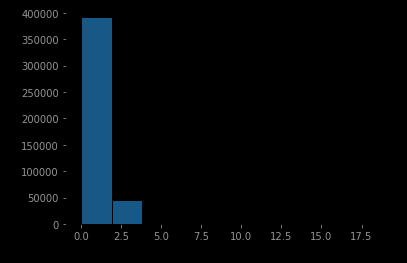

In [54]:
sns.histplot(data=df_clientes_unicos, x='Qtd_Filhos', bins = 10);